<a href="https://colab.research.google.com/github/princetyagitech/Computer_Vision/blob/master/Facial_and_eye_recognition_using_OpenCV_andMTCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

#Loading Image


In [ ]:
image=cv2.imread('/content/faces.jpg')

# Converting to RGB

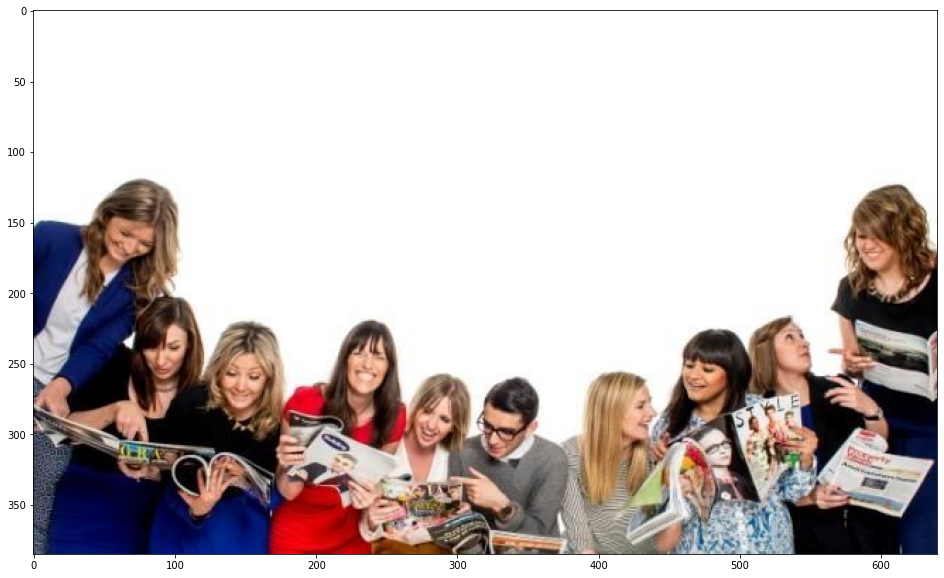

In [ ]:
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.imshow(image)

# Convert to grayscale as face could be detected pretty easily in grayscale too.


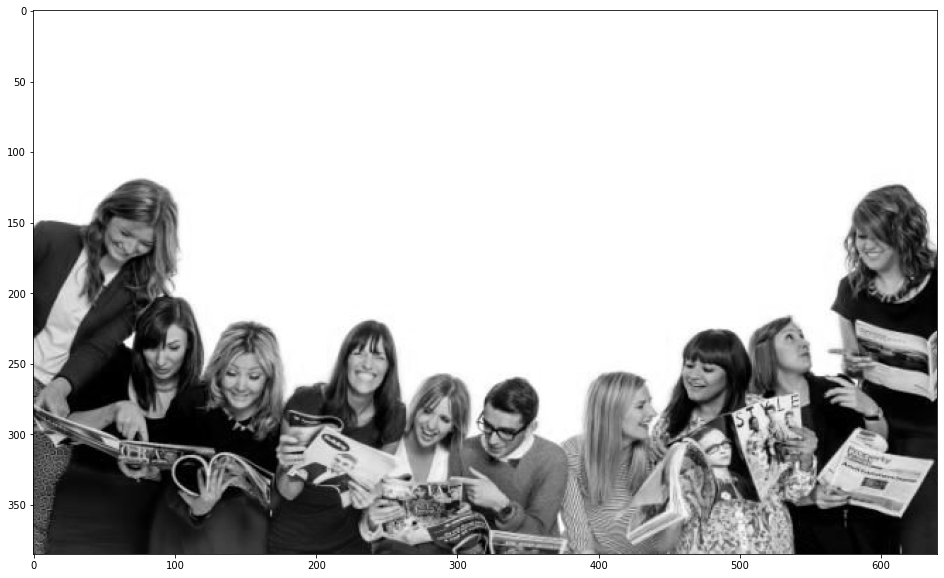

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  

plt.figure(figsize=(20,10))
plt.imshow(gray, cmap='gray')

# Using cv2 cascade classifier to detect the faces in the image

###Parameters in cascade classifier(image, scaleFactor, minNeighbors)
 you will often detect more faces with a smaller scaleFactor, and lower value for minNeighbors, but raising these values often produces better matches. Modify these values depending on your input image.

In [ ]:
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/harcascade/Copy of haarcascade_frontalface_default.xml')

# run the detector on the grayscale image
faces = face_cascade.detectMultiScale(image, 1.00099, 6)

In [ ]:
print('We found '+str(len(faces))+' faces in this image')

We found 22 faces in this image


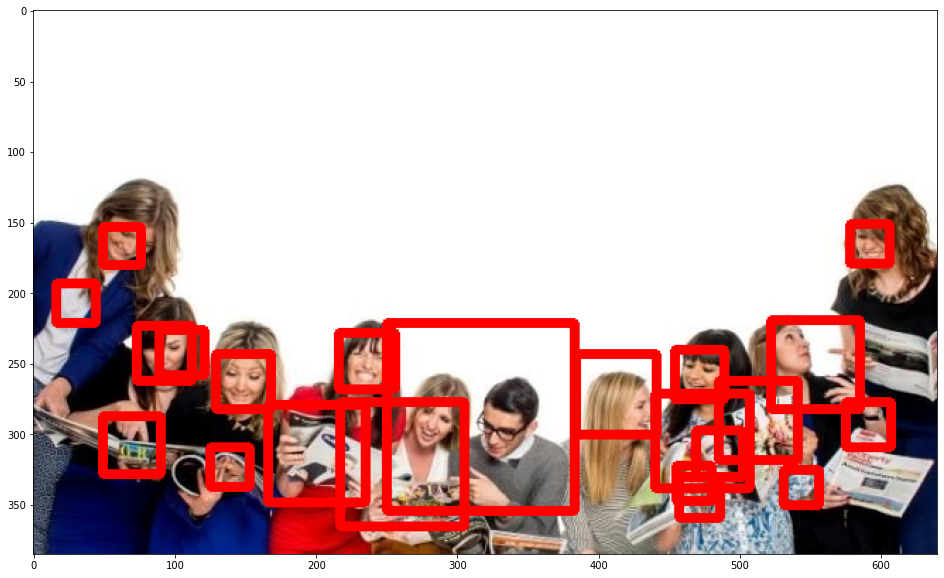

In [ ]:
img_with_detections = np.copy(image)   # make a copy of the original image to plot rectangle detections ontop of

for (x,y,w,h) in faces:
   
    cv2.rectangle(img_with_detections,(x,y),(x+w,y+h),(255,0,0),5)  

# display the result
plt.figure(figsize=(20,10))
plt.imshow(img_with_detections)

# Eye Detection


In [ ]:
# Loading Image
image_2=cv2.imread('/content/face_2.png')
image_2=cv2.cvtColor(image_2,cv2.COLOR_BGR2RGB)


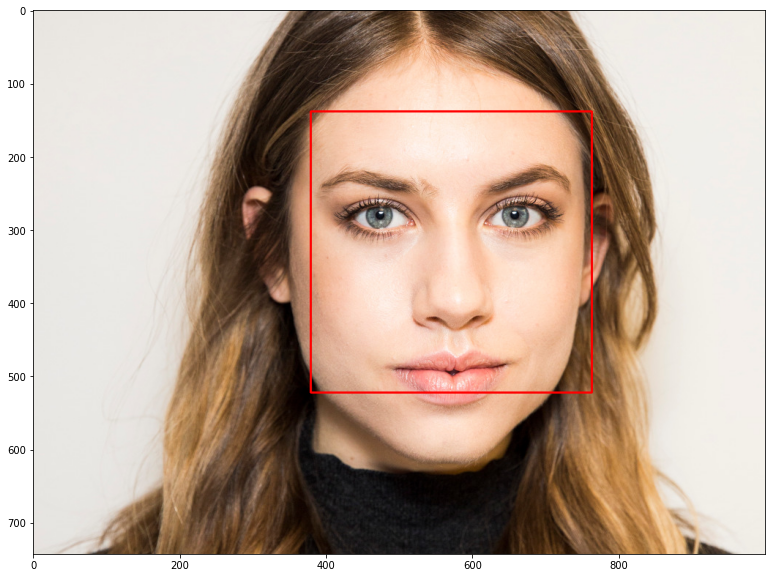

In [ ]:
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/harcascade/Copy of haarcascade_frontalface_default.xml')

eye_cascade = cv2.CascadeClassifier('/content/drive/My Drive/harcascade/haarcascade_eye.xml')

# run the detector on the grayscale image
faces = face_cascade.detectMultiScale(image_2, 4, 6)

img_with_detections = np.copy(image_2)   # make a copy of the original image to plot rectangle detections ontop of

for (x,y,w,h) in faces:
   
    cv2.rectangle(img_with_detections,(x,y),(x+w,y+h),(255,0,0),2)  
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = image_2[y:y + h, x:x + w]

    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
      cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

# display the result
plt.figure(figsize=(20,10))
plt.imshow(img_with_detections)

# Using Deep Learning MTCNN

In [1]:
!sudo pip install mtcnn

     |████████████████████████████████| 2.3MB 2.8MB/s 


In [5]:
import mtcnn
from mtcnn import MTCNN

In [8]:
model = MTCNN()

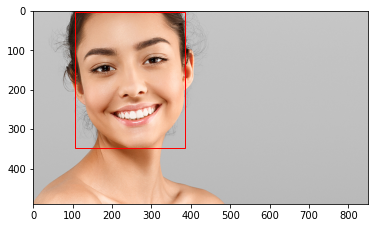

In [17]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
 
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
	# show the plot
	pyplot.show()
 
filename = '/content/face.jpg'
# load image from file
pixels = plt.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

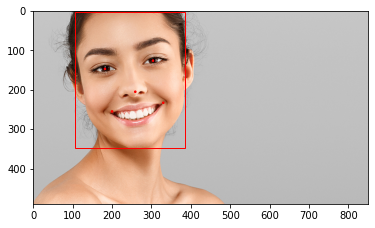

In [19]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
 
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
		# draw the dots
		for key, value in result['keypoints'].items():
			# create and draw dot
			dot = Circle(value, radius=2, color='red')
			ax.add_patch(dot)
	# show the plot
	pyplot.show()
 
filename = '/content/face.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)